In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("ipl.csv")

df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
df1=pd.read_csv("iplball.csv")
df1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# count played in each season

In [6]:
matches=df.groupby('date')['id'].agg('count')

In [7]:
matches

date
01-04-2010    1
01-04-2019    1
01-05-2008    2
01-05-2009    2
01-05-2011    2
             ..
30-10-2020    1
31-03-2010    2
31-03-2019    2
31-05-2008    1
31-10-2020    2
Name: id, Length: 596, dtype: int64

# total runs in season

In [8]:
matches=df.groupby('date')

In [9]:
runs=df1['total_runs'].sum()

In [10]:
runs

252794

# most umpire

In [11]:
ump=df.groupby('umpire1')['id'].agg('sum').reset_index().sort_values('id',ascending=False).head(1)

In [12]:
ump

,umpire1,id
2,AK Chaudhary,52727019


# team who won toss

In [13]:
team=df['toss_winner'].value_counts()

In [14]:
max=team.index[0]

In [15]:
max

'Mumbai Indians'

# what does team decide after winning toss

In [16]:
team=df['team1']

In [17]:
toss_winner=df['toss_winner']

In [18]:
decision=df['toss_decision']

In [19]:
data={}

In [20]:
for i in range(len(team)):
    if toss_winner[i]==team[i]:
        data[team[i]]=decision[i]

In [21]:
data

{'Royal Challengers Bangalore': 'bat',
 'Mumbai Indians': 'bat',
 'Deccan Chargers': 'field',
 'Kolkata Knight Riders': 'bat',
 'Rajasthan Royals': 'bat',
 'Chennai Super Kings': 'bat',
 'Kings XI Punjab': 'bat',
 'Delhi Daredevils': 'bat',
 'Kochi Tuskers Kerala': 'field',
 'Pune Warriors': 'bat',
 'Sunrisers Hyderabad': 'bat',
 'Rising Pune Supergiants': 'field',
 'Gujarat Lions': 'bat',
 'Rising Pune Supergiant': 'field',
 'Delhi Capitals': 'bat'}

# toss decision vary across seasons

In [22]:
import matplotlib.pyplot as plt

In [23]:
toss_decision=df[['date','toss_decision']]

In [24]:
season=toss_decision.groupby('date').agg({'toss_decision':'value_counts'})

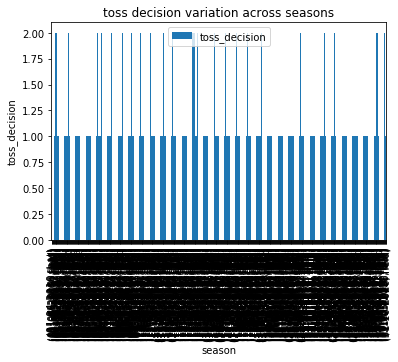

In [25]:
season.plot(kind='bar')
plt.xlabel('season')
plt.ylabel('toss_decision')
plt.title('toss decision variation across seasons')
plt.show()

# does the winning toss imply winning game

In [48]:
import numpy as np

In [49]:
winteam1=df['team1'].value_counts()
winpercent1=(winteam1/df.shape[0])*100
winteam2=df['team2'].value_counts()
winpercent2=(winteam2/df.shape[0])*100

In [50]:
teamtoss=df['toss_winner'].value_counts()
winpercenttoss=(teamtoss/df.shape[0])*100

In [57]:
winpercenttoss

Mumbai Indians                 12.990196
Kolkata Knight Riders          12.009804
Chennai Super Kings            11.887255
Royal Challengers Bangalore    10.661765
Rajasthan Royals               10.661765
Kings XI Punjab                10.416667
Delhi Daredevils                9.803922
Sunrisers Hyderabad             6.985294
Deccan Chargers                 5.269608
Pune Warriors                   2.450980
Delhi Capitals                  2.450980
Gujarat Lions                   1.838235
Kochi Tuskers Kerala            0.980392
Rising Pune Supergiants         0.857843
Rising Pune Supergiant          0.735294
Name: toss_winner, dtype: float64

# how many times chasing team win

In [30]:
chasing=df.loc[df.result=='chasing_team_won'].count()

In [31]:
chasing

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

# winning teams

In [32]:
team=df.groupby('team1')

In [33]:
team_list=df['team1'].unique()


In [34]:
winning=[]
for team1 in team_list:
    if(team.get_group(team1)['id'].sum()>0):
        winning.append(team1)

In [35]:
print("the winning teams are:",winning)

the winning teams are: ['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants', 'Rising Pune Supergiant', 'Delhi Capitals']


# team played most number of matches

In [36]:
team=df['team1'].value_counts()
print(team.head(1).index[0],"has played the most number of matches")

Royal Challengers Bangalore has played the most number of matches


# win matches

In [37]:
team_wins=df.groupby('team1')['id'].sum()
winning_team=team_wins.idxmax()

In [38]:
winning_team

'Royal Challengers Bangalore'

# highest percentage team

In [41]:
df['win']=df['id']/df['result_margin']

In [42]:
max=df['win'].max()

In [43]:
winteam=df.loc[df['win']==max,'team2'].iloc[0]

In [44]:
winteam

'Chennai Super Kings'

# inning wise comparision

In [99]:
grouped_df=df1.groupby('inning')
runs=grouped_df.apply(lambda x:x[['total_runs']].mean())
print(runs)

        total_runs
inning            
1         1.318172
2         1.294263


# team has highest score morethan 200

In [177]:
team_200=df1.loc[df1['total_runs']>=200]['id'].unique()

In [180]:
team_max=df1.loc[df1['id'].isin(team_200)].groupby('id')['total_runs'].count().sort_values(ascending=False)

In [111]:
team_max

Series([], Name: total_runs, dtype: int64)

# highest run scored

In [142]:
highest_run_scored=df1['total_runs'].max()


In [143]:
highest_run_team=df1.loc[df1['total_runs']==highest_run_scored,'id'].iloc[0]

In [144]:
print("the team that scored the highest run is {} with {} runs".format(highest_run_team,highest_run_scored))

the team that scored the highest run is 335988 with 7 runs


# margin run

In [146]:
df1['runmargin']=df1['total_runs']-df1['extra_runs']
max_win=df1['runmargin'].max()

In [147]:
max_win

6

# batsman played the most number of balls

In [148]:
balls=df1.groupby('batting_team')['batsman_runs'].sum()
top=balls.nlargest(1)

In [149]:
top

batting_team
Mumbai Indians    30547
Name: batsman_runs, dtype: int64

# top scorer

In [150]:
top_scorer=df1.sort_values(by="total_runs",ascending=False).head(1)


In [151]:
top_scorer

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,runmargin
185711,1216519,1,18,1,RR Pant,MP Stoinis,Mohammed Siraj,6,1,7,0,0,NaN,NaN,NaN,noballs,Delhi Capitals,Royal Challengers Bangalore,6


# who hit fours

In [169]:
four_hit=df1.batsman_runs.sum()
players=df1.groupby('batsman')['total_runs'].sum()
max_four_hitter=players.idxmax()                    

In [174]:
max_four_hitter

'V Kohli'

# who hit six

In [175]:
six_hit=df1.batsman_runs.sum()
players=df1.groupby('batsman')['non_boundary'].sum()
max_six_hitter=players.idxmax()

In [176]:
max_six_hitter

'V Kohli'

# highest striker

In [164]:
higheststrikerate=df1['non_striker'].max()
rowindex=df1.id[df1['non_striker']==higheststrikerate].tolist()
print("the player with highest strike rate is :",higheststrikerate)

the player with highest strike rate is : Z Khan


# leading wicket taker

In [165]:
leading=df1['is_wicket'].idxmax()
print("the leading wicket taker is:")
print(df1.loc[leading]['id'])

the leading wicket taker is:
335982


# most hosted stadium

In [167]:
max_stadium=df.groupby('venue').size().idxmax()

In [168]:
max_stadium

'Eden Gardens'